# Ejercicio 1

Tomar un texto en inglés y calcular la frecuencia de palabras.

# Ejercicio 2

Eliminar las "stopwords" y realizar "stemming" a mi conjunto de datos.

# Ejercicio 3

Realizar un análisis de sentimiento a mi conjunto de datos.

### Importación de librerías

In [1]:
import pandas as pd
import numpy as np
import re

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist  # Para calcular frecuencia de palabras
from nltk.stem import WordNetLemmatizer

import matplotlib.pyplot as plt
from itertools import islice # Para habilitar islice en dataframes pandas.
from matplotlib.patches import FancyArrowPatch  # Para especificar comportamiento de flechas.
from adjustText import adjust_text  # Para ajustar de forma automática texto en gráficas (no es la panacea, pero ayuda)

import requests  # Para descargar URL

In [2]:
# Descarga de datos necesaria para que funcione nltk (solo se hace la primera vez)
# nltk.download('all')

### Carga y limpieza inicial de datos

In [3]:
# URL del fichero (sacado del "Gutenberg Project")
url_romeo_and_juliet = "https://www.gutenberg.org/cache/epub/1513/pg1513.txt"

# Enviar request a la URL
response = requests.get(url_romeo_and_juliet)

# ¿Tiene éxito o no?
if response.status_code == 200:
    # Loading the content of the file into a variable
    romeo_and_juliet = response.text
    print("File loaded successfully!")
    # You can now proceed with sentiment analysis on text_content
    # For example, using text_content with nltk, TextBlob, or any other library
else:
    print(f"Failed to load the file. Status code: {response.status_code}")

File loaded successfully!


In [4]:
# print(romeo_and_juliet)

Hay que eliminar una serie de texto técnico-legal de la página web que "ensucia" el texto de cara al análisis. Así que eliminamos ese texto, que se encuentra antes y después de las líneas "*** START OF THE PROJECT GUTENBERG EBOOK ROMEO AND JULIET ***" y "*** END OF THE PROJECT GUTENBERG EBOOK ROMEO AND JULIET ***".

In [5]:
# Example markers
start_marker = "*** START OF THE PROJECT GUTENBERG EBOOK ROMEO AND JULIET ***"
end_marker = "*** END OF THE PROJECT GUTENBERG EBOOK ROMEO AND JULIET ***"

# Finding the indices of the start and end markers
start_index = romeo_and_juliet.find(start_marker)
end_index = romeo_and_juliet.find(end_marker)

# Adjusting the start_index to the end of the start marker
if start_index != -1:
    start_index += len(start_marker)

# Slicing the text to keep only the content between the start and end markers
if start_index != -1 and end_index != -1:
    romeo_and_juliet_cleaned = romeo_and_juliet[start_index:end_index]
else:
    romeo_and_juliet_cleaned = romeo_and_juliet # If markers are not found, keep the original text

# Now 'content' contains only the text between the specified markers


In [6]:
# romeo_and_juliet_cleaned

In [8]:
# Aquí se homogeneiza el formato "NOMBRE.\n" que no siempre se cumplía en el texto.

# Insert a newline between character names and their dialogue
character_dialogue_pattern = re.compile(r'([A-Z][A-Z\s\’]*\.) (?=[A-Z])')
romeo_and_juliet_normalized = character_dialogue_pattern.sub(r'\1\n', romeo_and_juliet_cleaned)

# Aquí substituimos múltiples caracteres de nueva línea por uno solo.
normalized_text = re.sub(r'\r\n?', '\n', romeo_and_juliet_normalized)
normalized_text = re.sub(r'\n{2,}', '\n', normalized_text)

# Las "acciones" van entre corchetes, pero algunas abarcan varias líneas. Hay que consolidarlas en una sola línea para que se detecten bien.
multi_line_action_pattern = re.compile(r'\[\_(.*?)\_\]', re.DOTALL)
normalized_text = multi_line_action_pattern.sub(lambda x: ' '.join(x.group().split()), normalized_text)


In [9]:
type(normalized_text)

str

In [10]:
len(normalized_text)

141359

Definimos una función que filtrará las "stopwords", incluyendo algunas que son características de textos arcaicos que en inglés reciente equivaldrían a partículas como "the", "them", etc.

In [11]:
def tokenizacion_lematizacion(text):
    # Tokenizar el texto
    tokens = word_tokenize(text.lower())
    # Especificar lo que sigue, que es necesario debido al lenguaje antiguo de la obra.
    stopwords_arcaicos = ['thou', 'thy', 'thee', 'thine', 'ye', 'thine']
    
    # Eliminar "stop words" y puntuación ("token.isalpha()" indica que queremos texto/tokens sin puntuación)
    filtered_tokens = [token for token in tokens if token not in stopwords.words('english') and token.isalpha() and token not in stopwords_arcaicos]

    # Lematizar los "tokens" (llevarlos a su "raiz" idiomática, por así decir)
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

    # Volver a fusionar los tokens en forma de string
    processed_text = ' '.join(lemmatized_tokens)

    return processed_text

Contaje de palabras del texto normalizado y lematizado:

In [12]:
normalized_lemmatized_text = tokenizacion_lematizacion(normalized_text)

# Calculate frequencies
tokens = word_tokenize(normalized_lemmatized_text.lower())
freq_dist = FreqDist(tokens)

# Display the most common words along with their frequencies
for word, frequency in freq_dist.most_common():
    print(word, frequency)

romeo 313
juliet 188
capulet 163
love 151
nurse 143
lady 122
come 121
shall 110
friar 104
mercutio 88
lawrence 81
good 80
tybalt 79
go 78
benvolio 77
enter 75
night 74
death 72
man 71
say 65
hath 64
paris 60
one 60
well 58
sir 57
day 57
art 55
would 55
make 52
give 52
scene 51
let 51
may 48
eye 48
dead 48
doth 47
yet 47
montague 46
fair 44
tell 44
prince 43
upon 42
st 41
know 41
look 41
take 40
ti 40
must 40
lie 40
time 40
hand 38
see 38
like 38
house 37
life 37
much 37
heart 36
word 35
first 34
call 34
servant 33
ay 33
sweet 33
gone 33
heaven 32
light 31
stay 31
men 30
u 30
wilt 30
back 30
lord 30
name 30
god 30
stand 29
speak 29
mine 29
old 28
peter 28
hast 28
hence 27
part 26
true 26
find 26
hear 25
tear 25
father 25
er 25
dear 25
bed 24
young 24
hour 24
gentleman 24
musician 23
therefore 23
away 23
madam 23
die 23
cell 22
cousin 22
sampson 22
made 22
till 22
bid 22
watch 22
head 21
wife 21
marry 21
ere 21
think 21
face 21
woe 21
thing 21
holy 21
friend 20
two 20
nay 20
keep 20
fare

Hemos obtenido un objeto "FreqDist" que contiene la información de la frecuencia de las palabras:

In [13]:
freq_dist

FreqDist({'romeo': 313, 'juliet': 188, 'capulet': 163, 'love': 151, 'nurse': 143, 'lady': 122, 'come': 121, 'shall': 110, 'friar': 104, 'mercutio': 88, ...})

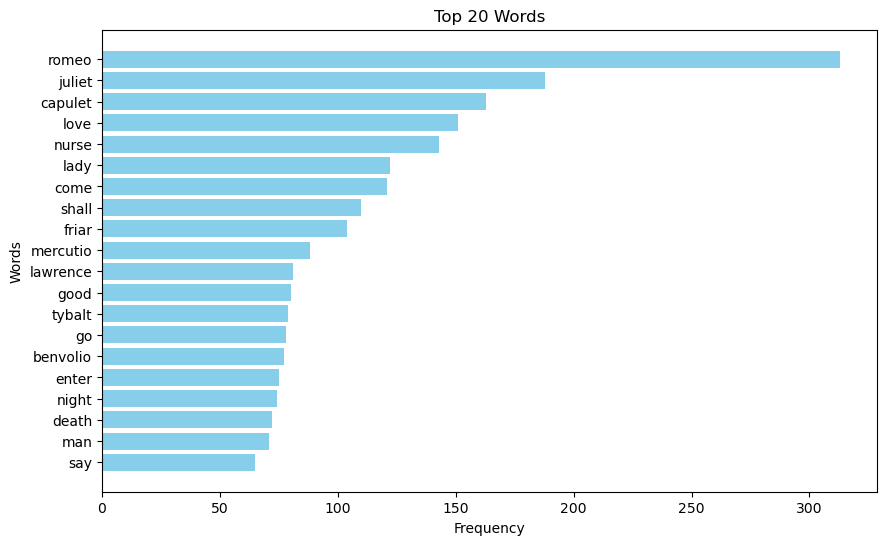

In [14]:
# Get the top 20 words and their frequencies
top_words = freq_dist.most_common(20)    # Método del objeto FreqDist que nos da el "top veinte".

# Extract words and frequencies
words, frequencies = zip(*top_words)  # Extraemos de dos en dos palabra y frecuencia.

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.barh(words, frequencies, color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 20 Words')

# Show the plot
plt.gca().invert_yaxis()  # Invert the y-axis to display the highest frequency word at the top
plt.show()

Observamos como muchas de las palabras más frecuentes son en realidad nombres de personajes. Luego, dado el tema de la obra, la palabra "amor", "love" más de 150 veces.

Le siguen cargos y oficios como "nurse", "lady", "friar"... o acciones como "come", "shall", "go", "say"... y otros términos "good", "night", "death", "man".... que aparecen entre 150 y 50 veces, según el caso.

### Análisis de sentimiento

A continuación haremos el análisis de sentimiento, pero trataremos de extraer el texto de cada personaje para ver qué personajes son más positivos y cuáles menos, en cuanto al texto que recitan.

In [15]:
# Recuperamos el texto normalizado pero aún no lematizado:
#normalized_text

Establecemos una serie de patrones que nos permitirán distinguir si está hablando un personaje (y cuál) o bien si estamos en el inicio de acto o se está describiendo algo en el texto.

In [16]:
lines = normalized_text.split('\n')

# Expresiones regulares que capturarán personajes, El inicio de las escenas, o la descripción de acciones
character_pattern = re.compile(r'^[A-Z][A-Z\s\’]*(?=\.)')
scene_pattern = re.compile(r'^(ACT|SCENE)\s.*', re.I)
action_pattern = re.compile(r'\[\_(.*?)\_\]')  # Refined to match actions with underscores
# Consider adding a pattern for broader scene descriptions or prologues if needed

script_content = {'dialogue': {}, 'actions': [], 'scenes': []}

# Los personajes tienen varias líneas, esta variable controla quién habla, si es que es un personaje.
current_character = None

for line in lines:
    if scene_pattern.match(line) or line.startswith("SCENE."):
        # Handle scene descriptions more broadly
        current_scene = line.strip()
        script_content['scenes'].append(current_scene)
        current_character = None
    elif character_pattern.match(line):
        current_character = line[:-1]
        script_content['dialogue'].setdefault(current_character, [])
    elif action_pattern.findall(line):
        # Extract actions
        actions = action_pattern.findall(line)
        script_content['actions'].extend([f'[_{action}_]' for action in actions])
        line = action_pattern.sub('', line).strip()
    elif current_character:
        # Add to dialogue if there's a current character, and the line is not just a scene description
        if line.strip() and not line.strip().startswith("SCENE."):
            script_content['dialogue'][current_character].append(line)

# Después de lo anterior tendremos el texto de todos los personajes en "scritp_content['dialogue']".
            
print("Scenes:", len(script_content['scenes']))
print("Actions:", len(script_content['actions']))
print("Characters speaking:", len(script_content['dialogue']))


Scenes: 59
Actions: 124
Characters speaking: 34


Trabajaremos con el diálogo solamente, comprobamos qué personajes ha recogido nuestro procesado:

In [17]:
script_content['dialogue'].keys()

dict_keys(['THE PROLOGUE', 'CHORUS', 'SAMPSON', 'GREGORY', 'ABRAM', 'BENVOLIO', 'TYBALT', 'FIRST CITIZEN', 'CAPULET', 'LADY CAPULET', 'MONTAGUE', 'LADY MONTAGUE', 'PRINCE', 'ROMEO', 'PARIS', 'SERVANT', 'NURSE', 'JULIET', 'MERCUTIO', 'FIRST SERVANT', 'SECOND SERVANT', 'CAPULET’S COUSIN', 'FRIAR LAWRENCE', 'PETER', 'FIRST MUSICIAN', 'SECOND MUSICIAN', 'THIRD MUSICIAN', 'BALTHASAR', 'APOTHECARY', 'FRIAR JOHN', 'PAGE', 'FIRST WATCH', 'SECOND WATCH', 'THIRD WATCH'])

In [18]:
# Se ha colado un no-personaje; lo elimino:
del script_content['dialogue']['THE PROLOGUE']

In [19]:
script_content['dialogue']

{'CHORUS': ['Three Musicians.',
  'An Officer.',
  'Citizens of Verona; several Men and Women, relations to both houses;',
  'Maskers, Guards, Watchmen and Attendants.',
  'Two households, both alike in dignity,',
  'In fair Verona, where we lay our scene,',
  'From ancient grudge break to new mutiny,',
  'Where civil blood makes civil hands unclean.',
  'From forth the fatal loins of these two foes',
  'A pair of star-cross’d lovers take their life;',
  'Whose misadventur’d piteous overthrows',
  'Doth with their death bury their parents’ strife.',
  'The fearful passage of their death-mark’d love,',
  'And the continuance of their parents’ rage,',
  'Which, but their children’s end, nought could remove,',
  'Is now the two hours’ traffic of our stage;',
  'The which, if you with patient ears attend,',
  'What here shall miss, our toil shall strive to mend.',
  'Now old desire doth in his deathbed lie,',
  'And young affection gapes to be his heir;',
  'That fair for which love groan’

Recogeremos el texto en un dataframe, asignándolo a cada personaje según corresponda.

In [20]:
# Prepare data for DataFrame
data = []

# Process dialogues
for character, lines in script_content['dialogue'].items():
    for line in lines:
        data.append({'text': line, 'type': 'dialogue', 'character': character})

# Create DataFrame
romeo_and_juliet_df = pd.DataFrame(data)

romeo_and_juliet_df

,text,type,character
0,Three Musicians.,dialogue,CHORUS
1,An Officer.,dialogue,CHORUS
2,"Citizens of Verona; several Men and Women, rel...",dialogue,CHORUS
3,"Maskers, Guards, Watchmen and Attendants.",dialogue,CHORUS
4,"Two households, both alike in dignity,",dialogue,CHORUS
...,...,...,...
3052,These dead men’s tombs.,dialogue,FIRST WATCH
3053,Here’s Romeo’s man. We found him in the church...,dialogue,SECOND WATCH
3054,"Here is a Friar that trembles, sighs, and weeps.",dialogue,THIRD WATCH
3055,We took this mattock and this spade from him,dialogue,THIRD WATCH


In [ ]:
romeo_and_juliet_df['processed_text'] = romeo_and_juliet_df['text'].apply(tokenizacion_lematizacion)

romeo_and_juliet_df

In [ ]:
# initialize NLTK sentiment analyzer

analyzer = SentimentIntensityAnalyzer()


# create get_sentiment function

def get_sentiment(text):

    scores = analyzer.polarity_scores(text)

    sentiment = 1 if scores['pos'] > 0 else 0

    return sentiment

In [ ]:
# apply get_sentiment function

romeo_and_juliet_df['sentiment'] = romeo_and_juliet_df['processed_text'].apply(get_sentiment)

romeo_and_juliet_df

In [ ]:
# Agrupar según personaje y calcular el sentimiento promedio
average_sentiment_per_character = romeo_and_juliet_df.groupby('character')['sentiment'].mean().reset_index()

# Print the result
average_sentiment_per_character.head()

Ya hemos obtenido el cálculo del sentimiento, pero no todos los personajes tienen la misma importancia.

In [ ]:
# Función lambda para contar las palabras mediante un "apply()"
romeo_and_juliet_df['word_count'] = romeo_and_juliet_df['processed_text'].apply(lambda x: len(x.split()))

# Agrupar por personaje y de modo que tengamos el sentimiento promedio y el número de palabras que hemos calculado
average_sentiment_per_character = romeo_and_juliet_df.groupby('character').agg({'sentiment': 'mean', 'word_count': 'sum'}).reset_index()

# Renombrar columnas
average_sentiment_per_character.rename(columns={'sentiment': 'mean_sentiment', 'word_count': 'total_word_count'}, inplace=True)

print(average_sentiment_per_character.head())

In [ ]:
# Ordenar en orden descendiente de número de palabras
average_sentiment_per_character = average_sentiment_per_character.sort_values(by='total_word_count', ascending=False)

# Extraer datos del dataframe
characters = average_sentiment_per_character['character']
mean_sentiment = average_sentiment_per_character['mean_sentiment']

# Barplot horizontal
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed

# Orden del eje "y", indicando seguir el orden del dataframe
plt.barh(range(len(characters)), mean_sentiment, color='skyblue')
# Especificar "ticks" y orden
plt.yticks(range(len(characters)), characters)

plt.xlabel('Mean Sentiment')
plt.ylabel('Character')
plt.title('Mean Sentiment per Character')

# Optionally, add this line to invert the y-axis and have the highest values at the top
plt.gca().invert_yaxis()

plt.show()


Como es de esperar, Romeo y Julieta son protagonistas, seguidos por el Fraile Lawrence y Capuleto y la enfermera. Es de destacar que el sentimiento promedio de todos los personajes principales es moderado o bajo. Solo el coro se desmarca, con un tono por encima de 0,5, y el personaje con menos texto, el "Tercer Músico", que se percibe como netamente positivo.

In [ ]:
plt.figure(figsize=(12, 8))
scatter = plt.scatter(average_sentiment_per_character['mean_sentiment'], average_sentiment_per_character['total_word_count'], color='skyblue', edgecolor='black')

texts = []
ax = plt.gca()

# Annotate points with character names
for i, row in islice(average_sentiment_per_character.iterrows(), 12):
    text = plt.text(row['mean_sentiment'], row['total_word_count'], row['character'], fontsize=6, ha='right', rotation=15)
    texts.append(text)

# Optimize text placement with adjust_text
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray', lw=1.5))

# Re-calculate arrow positions after text adjustment if necessary
# This is conceptual; in practice, you would need to manually adjust or use a different strategy
# for dynamic arrow drawing post-adjustment.

plt.xlabel('Mean Sentiment')
plt.ylabel('Number of Words')
plt.title('Mean Sentiment vs. Number of Words per Character')

plt.show()


En este "scatter plot" vemos lo mismo, desde otra perspectiva. Aquí queda mucho más claro que hay aproximadamente una decena de personajes más importantes que los demás, y que en general se caracterizan en cuanto a sentimiento por ser más bien negativo, o sea por debajo de 0,5.

Los múltiples otros personajes que son meras comparsas, secundarios o cuasi-figurantes no contribuyen tampoco según nuestras métricas a elevar la positividad de la obra (una tragedia, después de todo), añadiendo más tiniebla al conjunto.

Solo el coro y uno de los músicos (el punto que se desmarca a la derecha) muestra un tono algo más positivo, en el caso del "tercer músico", como si fuese ajeno al drama que se desarrolla en la obra.


Cabe añadir un último matiz: el lenguaje de esta obra es antiguo, arcaico, y es posible que esto represente una dificultad adicional para la correcta detección. No obstante, como no disponemos de un "benchmark" con el que contrastar ello, lo dejamos en este punto.